<a href="https://colab.research.google.com/github/sourabhumarani/airbnb-booking/blob/main/Airbnb_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What is the different types of room types and neighbourhood group available in the dataset ?
* What is the current status of unique neighbourhood group within columns like host name and host listing ?
* What is the distribution of price in Airbnb dataset ?
* What is the average room rent and availabilty of properties in a year at different locality in accordance with minimum nights and price provided within dataset ?
* What is the overall density and distribution of price within the different locations of neighbourhood group and also showing the price available under $500 ?
* How is neighbourhood, neighbourhood group and room types related to eachother in top locality and does it get affected by the booking of guest ?
* What is the trend of minimum nights within the area in respect of average price range ? </b>

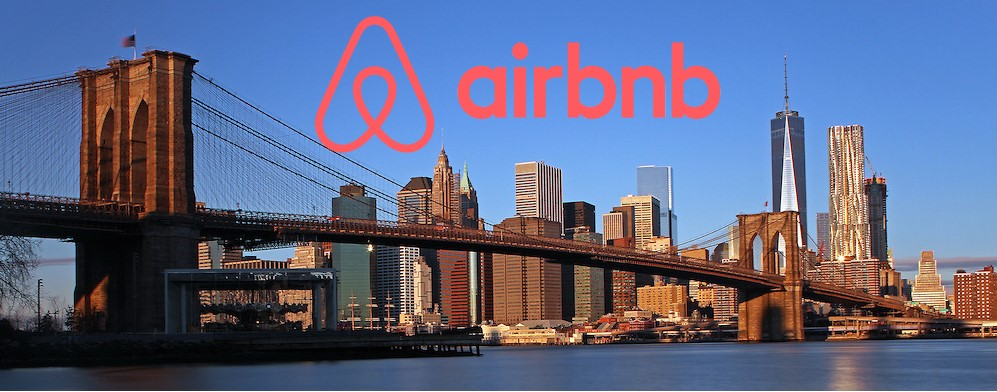

# **1. Importing Necessary Libraries**

In [ ]:
#importing required libraries for data handling and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Connecting google drive to this notebook 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Loading Data in Python.**


**Here We can load the dataset from drive, But Let's connect the csv file from github.**

In [ ]:
#reading the data using direct csv file link from github and saving it in variable 'df'

df = pd.read_csv('https://raw.githubusercontent.com/sourabhumarani/airbnb-booking/main/Airbnb%20NYC%202019.csv')

# **3. Data Understanding**

**Lets go through the dataset to get a basic understanding of given features and entries.**

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


#### 3.1 **Getting Unique Values in the Important Columns**

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#####**Here is the understanding of what each Column in the dataset represents**

* **id:** Listed Property ID
* **name:** Listed Property Name
* **host_id:** Host ID
* **host_name:** Host's Name
* **neighbourhood_group:** Regions in the New York City comprising of different Neighbourhods
* **neighbourhood:** Different Areas in the Neighbourhood Groups
* **latitude:** Latitude Coordinates
* **longitude:** Longitude Coordinates
* **room_type:** Listing Property Type
* **price:** Price in USD
* **minimum_nights:** Number of Minimum Nights
* **number_of_reviews:** Number of Reviews
* **last_review:** Last Review Given
* **reviews_per_month:** Reviews Given Per Month
* **calculated_host_listings_count:** Number of Listings per Host
* **availability_365:** Number of Days the Property is available for booking

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.shape

(48895, 16)

In [ ]:
for i in df.columns:
  print("Total Unique Values in", i, "-", len(df[i].unique()))

Total Unique Values in id - 48895
Total Unique Values in name - 47906
Total Unique Values in host_id - 37457
Total Unique Values in host_name - 11453
Total Unique Values in neighbourhood_group - 5
Total Unique Values in neighbourhood - 221
Total Unique Values in latitude - 19048
Total Unique Values in longitude - 14718
Total Unique Values in room_type - 3
Total Unique Values in price - 674
Total Unique Values in minimum_nights - 109
Total Unique Values in number_of_reviews - 394
Total Unique Values in last_review - 1765
Total Unique Values in reviews_per_month - 938
Total Unique Values in calculated_host_listings_count - 47
Total Unique Values in availability_365 - 366


**Lets see some countable unique values in columns like Neighbourhood Group & Room Type**

In [ ]:
print("Neighbourhood Group: ", df.neighbourhood_group.unique())
print("Room Type: ", df['room_type'].unique())

Neighbourhood Group:  ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Room Type:  ['Private room' 'Entire home/apt' 'Shared room']


#### **Now we know that the Data has 16 Columns & 48895 Entries (Rows) in total. The dataset seems to have some null values in some of the columns. Lets take a look at them in this next Data Cleansing part.**

# **4. Data Cleansing & Preparation**

Now that we know what the data is all about and values lets prepare the data for exploratory data analysis and visualization. First we will clean the data by handling the Null & Non Necessary Values.

In [ ]:
#lets check total number of null values in each column

df.isnull().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Also there are very few null values in columns 'host_name' (21) & Column 'name' (16) so we can drop this rows to get clear the null values

We can see that there are 10052 null values in both 'last_review' & 'reviews_per_month' columns which is very high in number, So we will replace those NaN values in these two colums with '0'

In [ ]:
#drop the null values in the columns 'host_name' & 'name'

df = df.dropna(subset=['host_name', 'name'])
df.isnull().sum().sort_values(ascending = False)

last_review                       10037
reviews_per_month                 10037
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#replace the NaN values in the columns with 0

df.fillna({'reviews_per_month':0, 'last_review':0}, inplace=True)
df.isnull().sum().sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We can also remove the column 'reviews per month' as its not only having large number of null values but also it has very low impact on our analysis.

In [ ]:
#removing the 'reviews per month column from the dataset

df.drop('reviews_per_month', inplace=True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#final dataset with cleaned Columns & Rows

df.shape

(48858, 15)

Lets Save this cleaned DataSet to a CSV file Before we start exploration

In [ ]:
#saving the cleaned datasheet as csv file

df.to_csv('airbnb_new.csv')

# **5. Data Analysis & Visualization**

####Now that we have cleaned dataset, we can start with our Exploratory Data  Analysis with Visualization

In [ ]:
#updated clean data

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365


### **Lets first reate a Map of NYC representing different neighbourhoods & neighbourhood groups.**

#### We will use 'geopy' and 'geopandas' for coordinates handling using longitude & latitude and geosaptial data operations. We will also use 'folium' and 'branca' for better visualization of the map.

In [ ]:
#installing and importing all the necessary libraries for geo mapping of the locations

!pip install geopy
import geopy
!pip install geopandas 
import geopandas as gpd
from geopy.geocoders import Nominatim
import folium
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 41.0 MB/s 
     |████████████████████████████████| 16.7 MB 392 kB/s 


In [ ]:
loc = df[['neighbourhood_group','neighbourhood','latitude','longitude', 'room_type']]
loc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type
0,Brooklyn,Kensington,40.64749,-73.97237,Private room
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt
2,Manhattan,Harlem,40.80902,-73.94190,Private room
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt


In [ ]:
address = 'New York City, NY'

# Getting the latitude and longitude of New York City, USA

geolocator = Nominatim(user_agent="Location_NY")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [ ]:
# making lists of latitude and longitude and zipping the both for location marking

lat= loc['latitude'].tolist()
long = loc['longitude'].tolist()
locations = list(zip(lat,long)) 

#using Folium library for specifying the position of all the locations on world map with using FastMarker Cluster 

ny_map = folium.Map(location=[40.7127281, -74.0060152], zoom_start=11.5, tiles='Stamen Terrain')    #Stamen Terrain shows the terrain effect on ground.
FastMarkerCluster(data=locations).add_to(ny_map)

#Displaying map
ny_map

The orange represents cluster of properties while as we get deeper in the locations the cluster get finer and finer represented by yellow and green respectively

### 5.2. Now that we have understood locations and properties in the given AIRBNB NYC 2019 Dataset, lets start statistical analysis by visualizing the values of features and correlations between different features and lets find out the answers to some important questions discussed in the beginning.

## **Q 1. What is the different types of room types and neighbourhood group available in the dataset ?**

#### **i) Finding the unique values and showing the distribution on different locations Neighbourhood Group** 
 - Neighbourhood Group
 - Property Type

#### **ii) Visualizing the Property Type distribution by Neighbourhood groups in NYC**

#### **Total Property Count by Neighbourhood Groups Distribution Visualization with Bar Chart, Area Scatter Chart and Pie Chart**

In [ ]:
#Finding the value counts of Neighbourhood group

Top_Neighbourhood_Groups = df['neighbourhood_group'].value_counts().reset_index()
Top_Neighbourhood_Groups

#changing the column names to make the graph more specific
Top_Neighbourhood_Groups.rename(columns={'index':'Neighbourhood Groups','neighbourhood_group':'Total Count'}, inplace=True)
Top_Neighbourhood_Groups

,Neighbourhood Groups,Total Count
0,Manhattan,21643
1,Brooklyn,20089
2,Queens,5664
3,Bronx,1089
4,Staten Island,373


<Figure size 792x576 with 0 Axes>

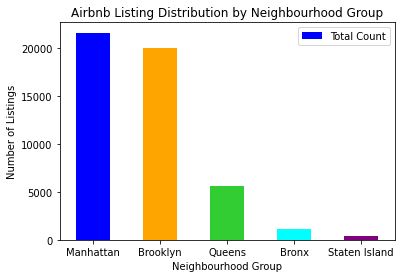

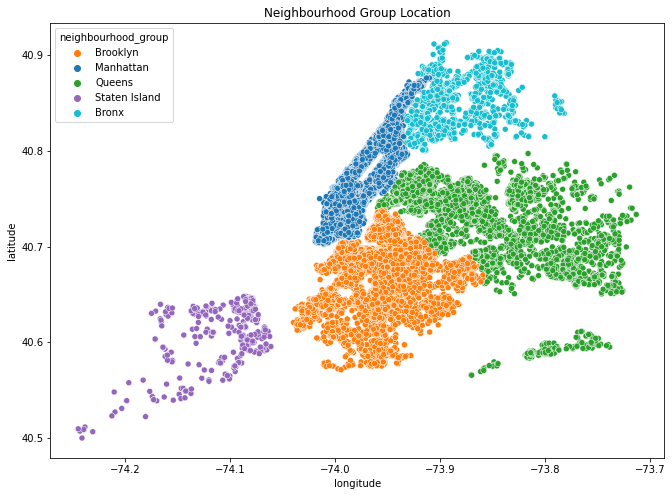

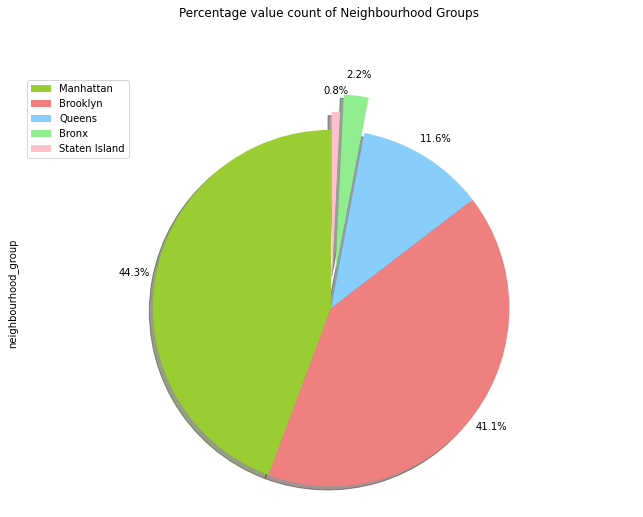

In [ ]:

#Plot 1 Displaying Bar Chart

plt.figure(figsize=(11,8))
Top_Neighbourhood_Groups.plot(kind='bar', x = 'Neighbourhood Groups', y = 'Total Count', color=['Blue', 'Orange', 'limegreen', 'Cyan', 'Purple'])
plt.title("Airbnb Listing Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=0, ha='center')

#Plot 2 - Displaying neighbourhood group map, we are using the latitude and longitude again to understand easily the accurate locations of different

title = 'Neighbourhood Group Location'
plt.figure(figsize=(11,8))

plt
sns.scatterplot(x=loc.longitude,y=loc.latitude,hue=loc.neighbourhood_group, palette=['tab:orange', 'tab:blue', 'tab:green', 'tab:purple', 'tab:cyan']).set_title(title)
plt.show()


#plot 3 - displaying Pie Chart for neighbourhood groups by percentage 

ng = df['neighbourhood_group'].value_counts() 
ng
   
colors_list = ['yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0, 0.2, 0.1]    # ratio for each continent with which to offset each wedge.

ng.plot(kind='pie', figsize=(11,8),
        autopct='%1.1f%%',
        startangle=90,     
        shadow=True,
        labels=None,
        pctdistance=1.12,
        colors=colors_list, 
        explode=explode_list            
        )
plt.title('Percentage value count of Neighbourhood Groups', y=1.12)
plt.axis('equal') 
plt.legend(labels=ng.index, loc='upper left') 

# Displaying the plot
plt.show()


#### **Total Count of Property Types visualized with Pie chart and NYC Scatter Chart**

In [ ]:
#finding property type distribution 

Room_Type_Distribution =df.groupby('room_type')['id'].count()

Room_Type_Distribution

room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: id, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


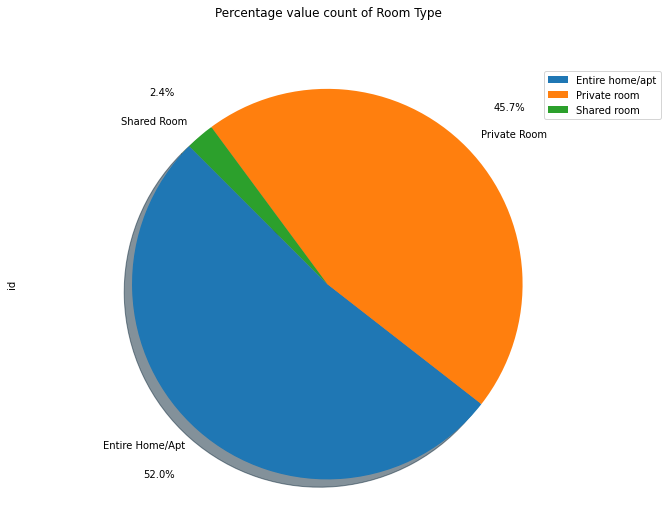

In [ ]:
#plot 4 - displaying pie chart of each room type by percentage


colors_list = ['tab:blue','tab:orange', 'tab:green']
room_labels = ['Entire Home/Apt', 'Private Room', 'Shared Room']
explode_list = [0,0,0] # ratio for each continent with which to offset each wedge.

#Pie Plot
Room_Type_Distribution.plot(kind='pie', figsize=(11,8),
        autopct='%1.1f%%',
        startangle=135,     
        shadow=True,
        labels=room_labels,
        pctdistance=1.3,
        radius = 0.5,
        colors=colors_list, 
        explode=explode_list
        )
plt.title('Percentage value count of Room Type', y=1.1)
plt.axis('equal') 
plt.legend(labels=Room_Type_Distribution.index, bbox_to_anchor=(1.05, 1), loc='top right') 


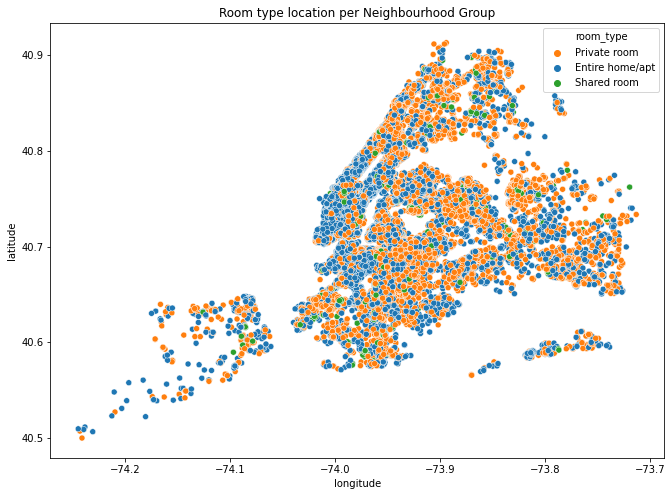

In [ ]:

#plot 5: Displaying Pie Chart of each room type based on location in the map

#Here we are using the latitude and longitude again to understand easily the accurate locations of different types room types


title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(11,8))
sns.scatterplot(x=loc.longitude,y=loc.latitude,hue=loc.room_type, palette=[ 'tab:orange', 'tab:blue', 'tab:green']).set_title(title)

#Displaying the plot
plt.show()

### It has been found that majority of **Entire home/apt**  are located in **Manhattan** which is further followed by **Brooklyn** where majority of **private rooms** are located.

#### **How much is the Average Price in each neighbourhood group for different room types?**

In [ ]:
#Defining the plot size using rcParams
plt.rcParams['figure.figsize']=(10,6)

In [ ]:
df23 = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

df23.sort_values('room_type', axis=1, ascending=True)
# df23.sort_values(by='room_type', axis=1, ascending=True)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

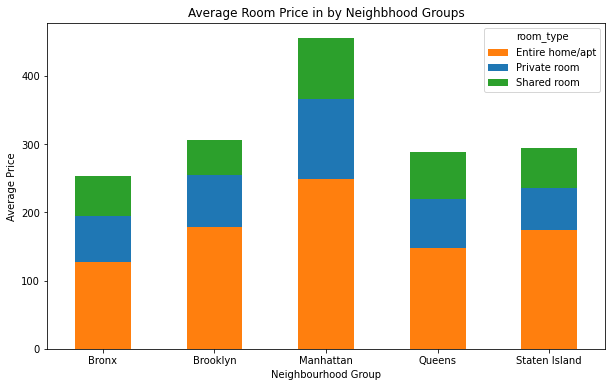

In [ ]:
#Plot 6 - Displaying Chart for Average Price for each property type in each neighbourhoodgroup

df23.plot(kind='bar', stacked=True, color=("tab:orange", "tab:blue", "tab:green"))
plt.title('Average Room Price in by Neighbhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=0, ha='center')

### As we can see **Manhattan has the highest average price for Entire Homes** as well as private rooms followed by brooklyn and staten island. We can also notice that Shared room price in Manahattan is highest followed by Queens

## **Q 2. What is the current status of unique neighbourhood group within columns like host name and host listing ?**

#### **Current Status of Neighbourhood Group with host names and their listing.**

In [ ]:
df1 = df.groupby (['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
df1.sort_values(by = 'calculated_host_listings_count', ascending= False ).head()

,host_name,neighbourhood_group,calculated_host_listings_count
13214,Sonder (NYC),Manhattan,327
1833,Blueground,Manhattan,230
9740,Michael,Manhattan,212
3249,David,Manhattan,202
9739,Michael,Brooklyn,159


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


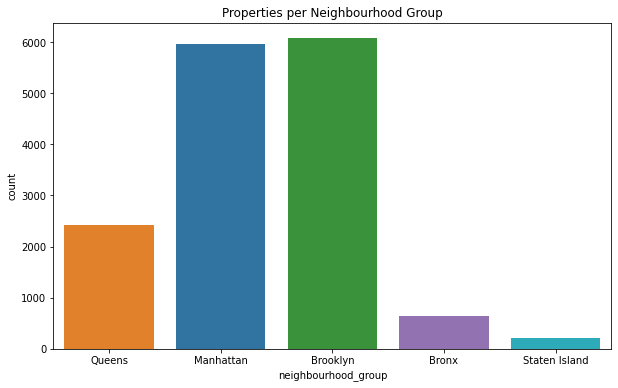

In [ ]:
# Plot 7
#Ploting the graph showing the properties present in each neighbourhood group 
title = 'Properties per Neighbourhood Group'
sns.countplot(df1['neighbourhood_group'], palette=['tab:orange', 'tab:blue', 'tab:green', 'tab:purple', 'tab:cyan'])
sns.set(rc = {'figure.figsize':(10,8)})
plt.title(title)
#Displaying the plot
plt.show()

### The current status shows that the maximum host listing has been seen at **Manhattan which is of host named Sonder (NYC) of total 	327 but for overall maximum host listing by hosts seen in Brooklyn**. Followed by Queens, Bronx and Staten Island. 

## **Q 3. What is the distribution of price in Airbnb dataset ?**

#### **Price distribution**

In [ ]:
df['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

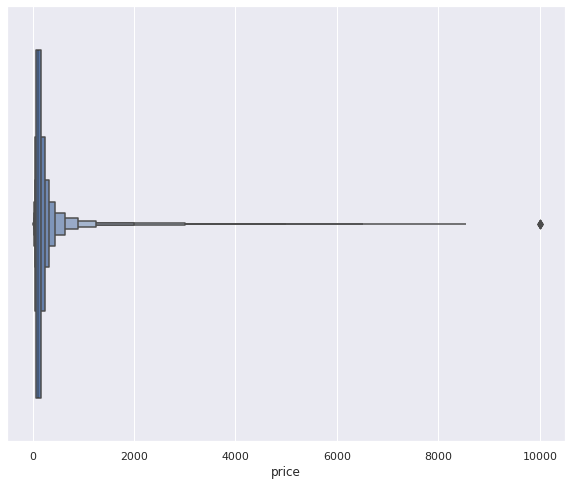

In [ ]:
# Plot 8 - Showing the distribution of price across the area 


figsize=(8,6)
#Using Box plot
sns.boxenplot(x='price',data=df)

#Displaying the plot
plt.show()

The summary statistics clearly shows that the Price ranges from  0− 180. But there also exists price which has a maximum of $10000. 

For any service sector firm like hotel industry here we have Airbnb dataset, the difference in prices is must be noticed as it depend upon many factors like locations, room types, season, neighbourhood, etc. In our main dataset we have also found some values are 0, which might be due to dynamic pricing or willingness of not to share price with the Airbnb and will be sharing to guest directly during booking. 

After that we plotted the boxplot to understand how the data is spread out for high ranges for the price irrespective of region.

## **Q 4. What is the average room rent and availability of properties in a year at different locality in accordance with minimum nights and price provided within dataset ?**

#### **Average room rent for locality**


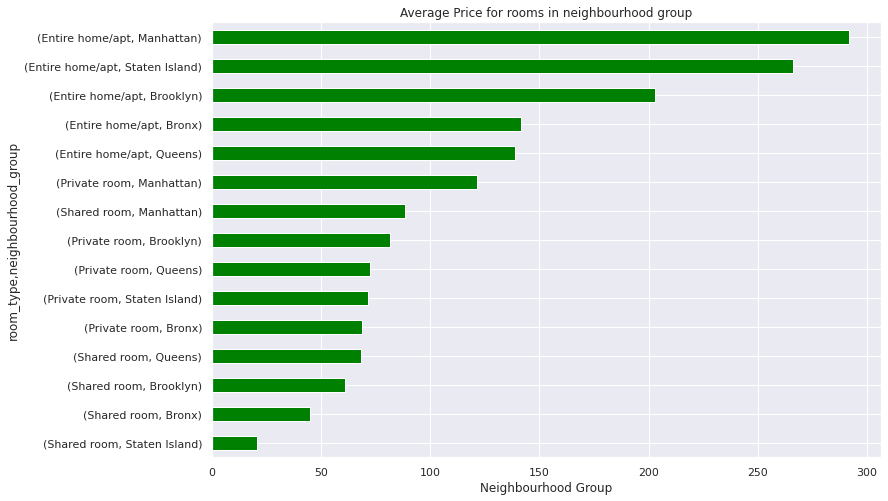

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.944196
                Staten Island        266.205128
                Manhattan            291.840807
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.487346
                Brooklyn              81.731334
                Manhattan            121.497409
Shared room     Staten Island         21.000000
                Bronx                 44.818182
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [ ]:
# Plot 9- Dispaying the average room rent for each locality, i.e, neighbourhood group

plt.figure(figsize=(12,8))
df = df[df['minimum_nights']==1]
df_1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df_1.plot(kind='barh', color='green')
plt.title('Average Price for rooms in neighbourhood group', y=1)
plt.xlabel('Neighbourhood Group')

plt.show()

#Printing the list of average price per night based on the neighbourhood group from the dataset
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df_1).sort_values(by='room_type')

As it is known for anyone among us who used to travel, the most important thing is the price since this sets the budget of the trip.The above figure clearly depicts out the following points which will further help the traveller to select out the the kind of room type they want according to the neighbourhood group and number of people travelling in group in terms of price. 

The major find out are:

a. Shared room at staten Island is the most cheapest stay per night whereas Renting a Entire apartment/Home at Manhattan per night is the most expensive.

b. Average price for Private room is also considerably expensive at manhattan so is the shared room at Manhattan is expensive than other private rooms of the neighbourhood. This clearly states that Manhattan is the expensive stay than any other locality.

c. Bronx is the most cheapest stay in terms of neighbourhood group comparison in respect to room type.

d. Though Shared room at Staten Island is the cheapest whereas Apartment renting is not cheapest at Staten Island. This can be due to the location of a perfect gateway from the rush of the city for a quality time with family get together.

We will also list out the average price for each type of room per neighbourhood so that tourists can plan based on the budget.

#### **Room Availability in 365 Days**

In [ ]:
df2 = df.groupby (['host_name','neighbourhood_group','room_type'])['availability_365'].count().reset_index()
df2.sort_values(by = 'availability_365', ascending= False ).head()

,host_name,neighbourhood_group,room_type,availability_365
2240,Gabriel,Manhattan,Private room,31
1560,David,Manhattan,Entire home/apt,29
209,Alex,Manhattan,Entire home/apt,27
4537,Melissa,Brooklyn,Private room,27
3030,Jessica,Brooklyn,Private room,26


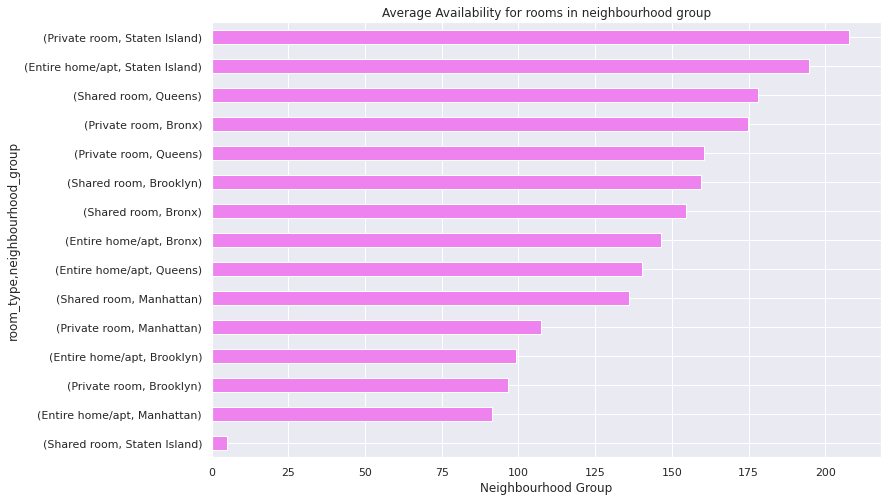

List of Average Availability of 365 days of room based on the neighbourhood group


availability_365
room_type       neighbourhood_group                  
Entire home/apt Manhattan                   91.535426
                Brooklyn                    99.080357
                Queens                     140.221374
                Bronx                      146.317647
                Staten Island              194.589744
Private room    Brooklyn                    96.512763
                Manhattan                  107.503282
                Queens                     160.376379
                Bronx                      174.909483
                Staten Island              207.802817
Shared room     Staten Island                5.000000
                Manhattan                  136.159011
                Bronx                      154.590909
                Brooklyn                   159.612121
                Queens                     177.981982

In [ ]:
# Plot 10 - Dispaying the average availability of rooms in 365 days for each locality, i.e, neighbourhood group

plt.figure(figsize=(12,8))
av = df[df['price']==1]
df_2 = df.groupby(['room_type','neighbourhood_group'])['availability_365'].mean().sort_values(ascending=True)
df_2.plot(kind='barh', color='violet')
plt.title('Average Availability for rooms in neighbourhood group', y=1)
plt.xlabel('Neighbourhood Group')
#Displaying plot
plt.show()

#Printing the list of average availability of 365 days of room based on the neighbourhood group from the dataset
print('List of Average Availability of 365 days of room based on the neighbourhood group')
pd.DataFrame(df_2).sort_values(by='room_type')

The above figure depicts the average availability of 365 days of properties among the neighbourhood group according to the room type. Such finding will going to help the guest/traveller in shortlisting the those properties according to room type is available for booking in season or whole the year of 365 days.

The major find out are-

a. Among all of average availability of properties, Staten Island has the least availability of rooms in shared room category among all the neighbourhood in terms of price.

b. But among all the room categories in Staten Island only there is maximum availability in the private room types as the whereas in other neighbourhoods it is followed by Bronx, Queens, Manhattan and Brooklyn on average basis.

c. In the entire home/apt type room same sequence follows Staten Island, Bronx, Queens, Brooklyn and Manhattan.

d. The only thing which can be pointed out after all the above points of our result there is less flow of guests in Staten Island in compare to other neighourhood groups. 

## **Q 5. What is the overall density and distribution of price within the different locations of neighbourhood group and also showing the price available under $500 ?**

#### **Neighbourhood Group and Price Distribution**

In [ ]:
#finding about the number of neigbourhoods

# 1.Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
# 2.Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
# 3.Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
# 4.Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
# 5.Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]

#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [ ]:
#creating an empty list 
p_n=[]

#creating list neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#creating a for loop to get statistics for price ranges and append
for x in price_list_by_n:                                               # Use of function method
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_n.append(i)

#changing names of the price column to the area name  
p_n[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_n[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_n[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_n[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_n[4].rename(columns={'price':nei_list[4]}, inplace=True)

#finilizing dataframe for final view    
stats_df=p_n
stats_df=[df.set_index('Stats') for df in stats_df]
stats_df=stats_df[0].join(stats_df[1:])
stats_df#creating an empty list 
p_n=[]

#creating list neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#creating a for loop to get statistics for price ranges and append
for x in price_list_by_n:                                               # Use of function method
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_n.append(i)

#changing names of the price column to the area name  
p_n[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_n[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_n[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_n[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_n[4].rename(columns={'price':nei_list[4]}, inplace=True)

#finilizing dataframe for final view    
stats_df=p_n
stats_df=[df.set_index('Stats') for df in stats_df]
stats_df=stats_df[0].join(stats_df[1:])
stats_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,10.0,10.0,13.00,10.0
25%,55.0,81.0,50.0,50.00,45.0
50%,75.0,120.0,68.0,67.50,60.0
75%,119.0,199.0,99.0,106.25,95.0
max,8000.0,7703.0,2000.0,5000.00,1000.0


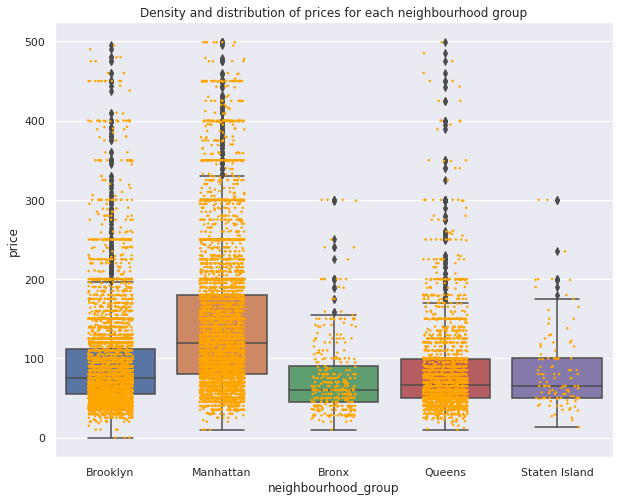

In [ ]:
# Plot 11 

# Adding a Stripplot, where we can show all observations along with some representation of the underlying distribution.
# Creating a sub-dataframe with no extreme values / less than 500

pn=df[df.price < 500]
ax = sns.boxplot(x='neighbourhood_group', y='price', data=pn)
# add stripplot
ax = sns.stripplot(x='neighbourhood_group', y='price', data=pn, color="orange", jitter=0.2, size=2.5)
sns.set_style("white")

# adding title
plt.title("Density and distribution of prices for each neighbourhood group", loc="center")
# show the plot
plt.show()

*Here we have used Jitter along with our boxplot() and striplot(), which is simply the addition of a small amount of horizontal (or vertical) variability to the data in order to ensure all data points are visible.*

#### Here, with a statistical table and a combination of box plot & stri plot with 'Jitter' in to it, we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with \\$150 price as average observation, followed by Brooklyn with \\$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

#### **Location based price under $500 against the availability of properties in a year**

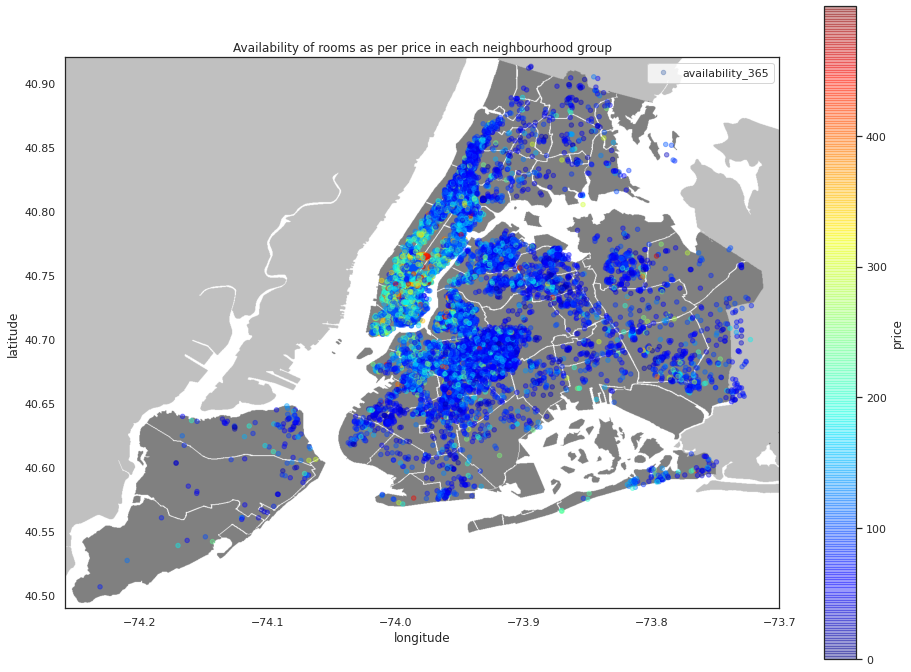

In [ ]:
# importing URL handling library

import urllib

plt.figure(figsize=(16,12))
#loading the png NYC image from Google 
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude with max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

# Plot 12 - Displaying Scatter Map Over the NYC Map with Average Price being represented by color of dots

lat_long=pn.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5, ax=ax)
plt.title("Availability of rooms as per price in each neighbourhood group", loc="center")
lat_long.set_facecolor("white")
lat_long.legend()

## **Q 6. How is neighbourhood, neighbourhood group and room types related to eachother in top locality and does it get affected by the booking of guest ?**

#### **Relation of neighbourhood, neighbourhood groups and room types**

In [ ]:
df.neighbourhood_group.value_counts().head()

Manhattan        5408
Brooklyn         4643
Queens           2176
Bronx             361
Staten Island     112
Name: neighbourhood_group, dtype: int64

In [ ]:
#Finding top 10 neighbourhoods from cleaned dataframe

df.neighbourhood.value_counts().head(10)

Bedford-Stuyvesant    837
Williamsburg          789
Harlem                712
Bushwick              653
Hell's Kitchen        575
Upper West Side       478
East Village          433
Upper East Side       424
Crown Heights         374
Midtown               369
Name: neighbourhood, dtype: int64

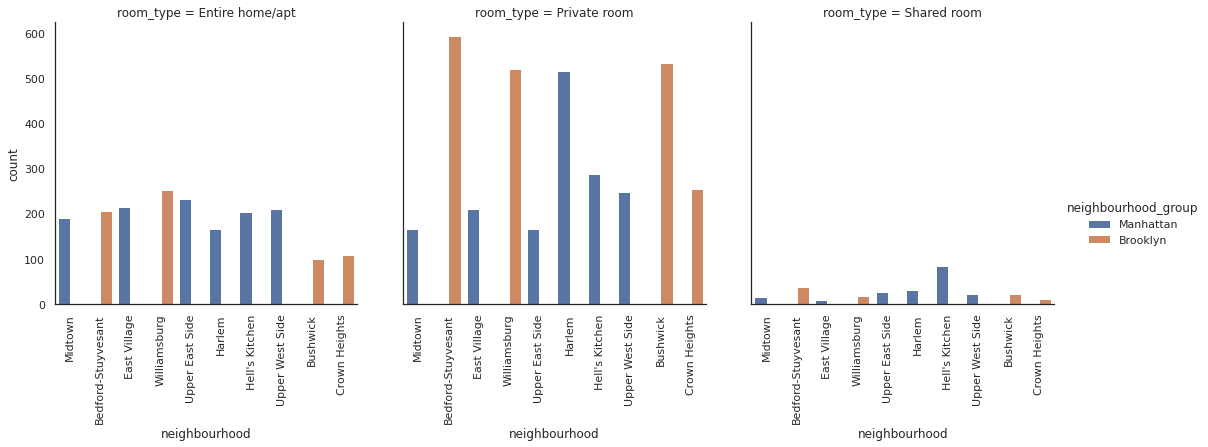

In [ ]:
# Plot 13

#Here we will be using only top 2 neighbourhood groups of Manhattan and Brooklyn as both of them appeared most in top 10 neighbourhoods
#with top 10 neighbourhoods

neigh= df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot representing multiple attributes together and a count
ax =sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neigh, kind='count')
ax.set_xticklabels(rotation=90)

####  **Major findings:-**

*   Here it can be seen that the top 10 neighbourhoods around the major neighbourhood group of Manhattan and Brooklyn. 
* Here the catplot clearly letting us understand that majority of the room booked in the neighbourhood is **Entire room/apt** for long term booking followed by **private room** for short term booking while the least is **Shared room**. 
*  Among all the top 10 neighbourhoods, in entire room/apt - maximum room type is in **Williamsburg** in Brooklyn while in Manhattan maximum room type is in **Upper East Side** followed by **Upper West Side**.
* In Private room type - maximum is present at **Bedford-Stuyvesant** in Brooklyn while in Manhattan maximum is present at **Harlem**.
* In Shared room type - maximum is present at **Bedford-Stuyvesant** followed by **Bushwick** in Brooklyn while in Manhattan maximum is present at **Hell's Kitchen**.


## **Q 7. What is the trend of minimum nights within the area in respect of average price range ?**

#### **Minimum night trend with average price range**

In [ ]:
df['minimum_nights'].describe()

count    12700.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: minimum_nights, dtype: float64

In [ ]:
#taking a look at minimum nights data
print(df['minimum_nights'].describe())
#Finding the maximum value
print("\nMaximum number of Minimums nights listed -", df.minimum_nights.max())
#Finding the minimum value
print("Minimum number of Minimums nights listed -", df.minimum_nights.min())
#Finding the length of column
print("Unique Values in minimum_nights Column -", len(df.minimum_nights.unique()))

count    12700.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: minimum_nights, dtype: float64

Maximum number of Minimums nights listed - 1
Minimum number of Minimums nights listed - 1
Unique Values in minimum_nights Column - 1


minimum_nights
1    142.062756
Name: price, dtype: float64


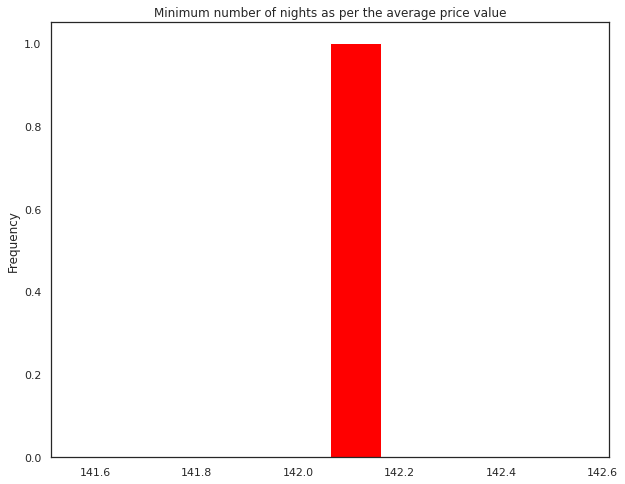

In [ ]:
# Plot 14

#Finding out the total unique values of minimum number of nights as per the average price value
df5 = df.groupby('minimum_nights')['price'].mean()
print(df5)
#Displaying in histogram plot
df5.plot(kind='hist', x = 'price' , y = 'minimum_nights', color='red')
plt.title("Minimum number of nights as per the average price value", loc="center")
sns.set(rc={'figure.figsize': (10,8)})
sns.set_style('white')

#### Here it can be seen that maximum minimum nights listing can be found within the range of under 7 days of booking and again minimum nights for 30 days. 

#  **6. Correlation Diagram**

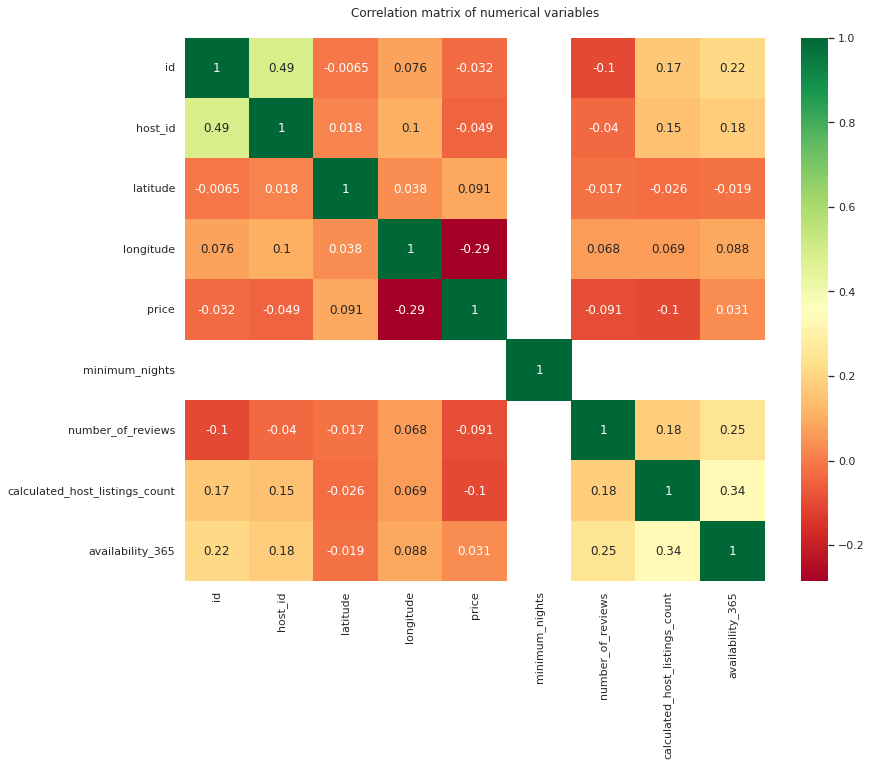

In [ ]:
# Plot 15 - Correlation Diagram for different features in the dataset

corr1 = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation matrix of numerical variables\n")
sns.heatmap(corr1, annot=True, cmap='RdYlGn')
plt.show()

#### From the graph above, we know that there is not a strong correlation except review_per_month and number_of_review. Else not much correlation we can get from the present dataset. 

# **7. Conclusion**

#### ***Summarizing our findings, suggesting other features***

### **From the Dataset After Cleaning and Analysis, we have, here created 15 Charts for vizualization. After reading the charts and analysis we have come to the conclusion that can be listed as below:**

The present given and explored dataset of Airbnb 2019, helps us to analyse different types of columns associated with their work. 

* First, we found that the most number of listing in Airbnb properties are directly dependent on the requirement/purpose of the guest, either they booking for tourism, work, etc.
* Secondly, we found that neighbourhood areas, room type, minimum number of nights, price, availability 365, listing of hosts are some of the most important columns used in our analysis, as it helped us to identify the direct relationship and trend of booking.
* Among all the locality Manhattan is the most expensive for booking and it has also the maximum number of listings of 327 by the host. 
* Variation in price range is another major factor for booking rate within the neighbourhood. 
* Also for the intractive part we have included geographical maps which further helps anyone to easily locate the individual area what they are looking for which is very important. 

Lastly, we found some data columns like last review and reviews per month had lot of missing value which more or less restricted us to include in our current analysis. Further suggestion, there was need for guest listing review ratings (0-5 or good-satisfactory-bad) column, as this would really helpful in predicting deeper on overall experience of guest listings. Overall, we able to discover a good number of interesting relationships among different variables and features in each step of process. In short, guest listing and hosts service are the two important components for the successful run of business which Airbnb ('AB_NYC_2019') does.